# Libraries

In [4]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mne.viz import plot_compare_evokeds
from scipy import stats


# for save and load dict variables
import pickle

# General parameters

In [21]:
# subjects to exclude
exclude_ppts = [
    '0027', # vot, incomplete eeg recording due to wrong sound library setting
    '0028', # f0, missing block 3 and 4
    '0030', # missing block 3 and 4
    '0034', # missing block 3
    '0040', # f0, missing block 3 and 4
    '0046', # f0, missing block 2,3,4

    # '0008', # too many bad trials
    # '0024', # too many bad trials
    # '0037', # too many bad trials
    
    # '0005', # non-native
    # '0010', # non-native
    # '0015', # non-native
    # '0020', # non-native
    # '0023', # non-native
    # '0025', # non-native
    # '0026', # left-handed
    # '0045', # 
]


savefolder = 'Jun_1_2025'


#### directory ####
input_dir = os.getcwd() + '/../preprocessed/5_erp_averaged/' + savefolder
output_dir = os.getcwd() + '/../figures/' + savefolder
# create folder if not existed
os.makedirs(output_dir, exist_ok=True)

# output_dir_individual = os.getcwd() + '/../figures/' + savefolder + '/individual erp'
# os.makedirs(output_dir_individual, exist_ok)

# read in the ERP data:
with open(input_dir + '/all_evokeds.pkl', 'rb') as file:  # Python 3: open(..., 'rb')
    all_evokeds = pickle.load(file)

# get participants that came this far
all_ppts = all_evokeds.keys()

# get time info from any evoked data
evoked = all_evokeds['F0_0001']['dorsal_highStan_lowDevi_devi_f74v11']
time_labels = evoked.times*1000
time_labels = [str(int(x)) for x in time_labels]
n_time = len(time_labels)

# get channel info
chan_list = evoked.info['ch_names']

# create a dictionary for condition key and standard and deviant cells ####
cell_dict = {
    'VOT': {
        'withinBlockMMN_glottal_longVOT': {
            'standard': 'glottal_lowStan_highDevi_stan',
            'deviant': 'glottal_lowStan_highDevi_devi',
            'legend': ['standards (short VOT)', 'deviants (long VOT)']
        },
        'withinBlockMMN_glottal_shortVOT': {
            'standard': 'glottal_highStan_lowDevi_stan',
            'deviant': 'glottal_highStan_lowDevi_devi',
            'legend': ['standards (long VOT)', 'deviants (short VOT)']
        },
        'withinBlockMMN_dorsal_longVOT': {
            'standard': 'dorsal_lowStan_highDevi_stan',
            'deviant': 'dorsal_lowStan_highDevi_devi',
            'legend': ['standards (short VOT)', 'deviants (long VOT)']
        },
        'withinBlockMMN_dorsal_shortVOT': {
            'standard': 'dorsal_highStan_lowDevi_stan',
            'deviant': 'dorsal_highStan_lowDevi_devi',
            'legend': ['standards (long VOT)', 'deviants (short VOT)']
        },
        'identityMMN_glottal_longVOT': {
            'standard': 'glottal_highStan_lowDevi_stan',
            'deviant': 'glottal_lowStan_highDevi_devi',
            'legend': ['standards (long VOT)', 'deviants (long VOT)']
        },
        'identityMMN_glottal_shortVOT': {
            'standard': 'glottal_lowStan_highDevi_stan',
            'deviant': 'glottal_highStan_lowDevi_devi',
            'legend': ['standards (short VOT)', 'deviants (short VOT)']
        },
        'identityMMN_dorsal_longVOT': {
            'standard': 'dorsal_highStan_lowDevi_stan',
            'deviant': 'dorsal_lowStan_highDevi_devi',
            'legend': ['standards (long VOT)', 'deviants (long VOT)']        
        },
        'identityMMN_dorsal_shortVOT': {
            'standard': 'dorsal_lowStan_highDevi_stan',
            'deviant': 'dorsal_highStan_lowDevi_devi',
            'legend': ['standards (short VOT)', 'deviants (short VOT)']
        }
    },
    
    'F0': {
        'withinBlockMMN_glottal_highF0': {
            'standard': 'glottal_lowStan_highDevi_stan',
            'deviant': 'glottal_lowStan_highDevi_devi',
            'legend': ['standards (low F0)', 'deviants (high F0)']
        },
        'withinBlockMMN_glottal_lowF0': {
            'standard': 'glottal_highStan_lowDevi_stan',
            'deviant': 'glottal_highStan_lowDevi_devi',
            'legend': ['standards (high F0)', 'deviants (low F0)']        
        },
        'withinBlockMMN_dorsal_highF0': {
            'standard': 'dorsal_lowStan_highDevi_stan',
            'deviant': 'dorsal_lowStan_highDevi_devi',
            'legend': ['standards (low F0)', 'deviants (high F0)']        
        },
        'withinBlockMMN_dorsal_lowF0': {
            'standard': 'dorsal_highStan_lowDevi_stan',
            'deviant': 'dorsal_highStan_lowDevi_devi',
            'legend': ['standards (high F0)', 'deviants (low F0)']
        },
        'identityMMN_glottal_highF0': {
            'standard': 'glottal_highStan_lowDevi_stan',
            'deviant': 'glottal_lowStan_highDevi_devi',
            'legend': ['standards (high F0)', 'deviants (high F0)']
        },
        'identityMMN_glottal_lowF0': {
            'standard': 'glottal_lowStan_highDevi_stan',
            'deviant': 'glottal_highStan_lowDevi_devi',
            'legend': ['standards (low F0)', 'deviants (low F0)']
        },
        'identityMMN_dorsal_highF0': {
            'standard': 'dorsal_highStan_lowDevi_stan',
            'deviant': 'dorsal_lowStan_highDevi_devi',
            'legend': ['standards (high F0)', 'deviants (high F0)']
        },
        'identityMMN_dorsal_lowF0': {
            'standard': 'dorsal_lowStan_highDevi_stan',
            'deviant': 'dorsal_highStan_lowDevi_devi',
            'legend': ['standards (low F0)', 'deviants (low F0)']
        }
    }
}

# Read in file and get info

In [19]:
# read in the ERP data:
with open(input_dir + '/all_evokeds.pkl', 'rb') as file:  # Python 3: open(..., 'rb')
    all_evokeds = pickle.load(file)

# conditions keys for vot and f0 groups
vot_conds = all_evokeds['VOT_0003'].keys()
f0_conds = all_evokeds['F0_0001'].keys()

# Single-participant, single-condition visualization

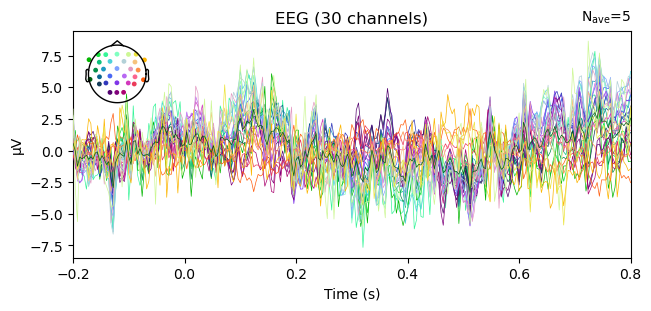

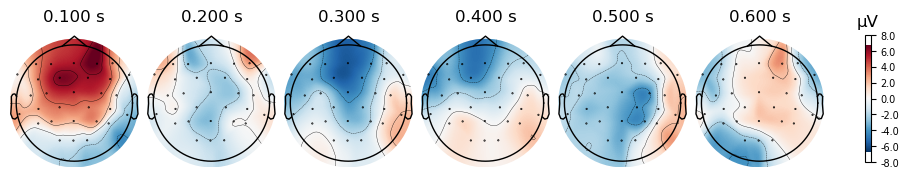

In [12]:
# single-subject, single-condition butterfly
evoked = all_evokeds['F0_0001']['dorsal_highStan_lowDevi_devi_f74v11']

# waveform
evoked.plot()

# scalp topography
times = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
evoked.plot_topomap(times=times, colorbar=True)

plt.show()

# Grand-average topographic subplots

## parameters

In [36]:
# choose cell for visualization
cell = 'identityMMN_dorsal_shortVOT'

# choose from:
# 'withinBlockMMN_glottal_longVOT',
# 'withinBlockMMN_glottal_shortVOT',
# 'withinBlockMMN_dorsal_longVOT',
# 'withinBlockMMN_dorsal_shortVOT',
# 'identityMMN_glottal_longVOT',
# 'identityMMN_glottal_shortVOT',
# 'identityMMN_dorsal_longVOT',
# 'identityMMN_dorsal_shortVOT',
# 'withinBlockMMN_glottal_highF0',
# 'withinBlockMMN_glottal_lowF0',
# 'withinBlockMMN_dorsal_highF0',
# 'withinBlockMMN_dorsal_lowF0',
# 'identityMMN_glottal_highF0',
# 'identityMMN_glottal_lowF0',
# 'identityMMN_dorsal_highF0',
# 'identityMMN_dorsal_lowF0',

"\n# 'withinBlockMMN_glottal_longVOT',\n# 'withinBlockMMN_glottal_shortVOT',\n# 'withinBlockMMN_dorsal_longVOT',\n# 'withinBlockMMN_dorsal_shortVOT',\n# 'identityMMN_glottal_longVOT',\n# 'identityMMN_glottal_shortVOT',\n# 'identityMMN_dorsal_longVOT',\n# 'identityMMN_dorsal_shortVOT',\n# 'withinBlockMMN_glottal_highF0',\n# 'withinBlockMMN_glottal_lowF0',\n# 'withinBlockMMN_dorsal_highF0',\n# 'withinBlockMMN_dorsal_lowF0',\n# 'identityMMN_glottal_highF0',\n# 'identityMMN_glottal_lowF0',\n# 'identityMMN_dorsal_highF0',\n# 'identityMMN_dorsal_lowF0',\n"

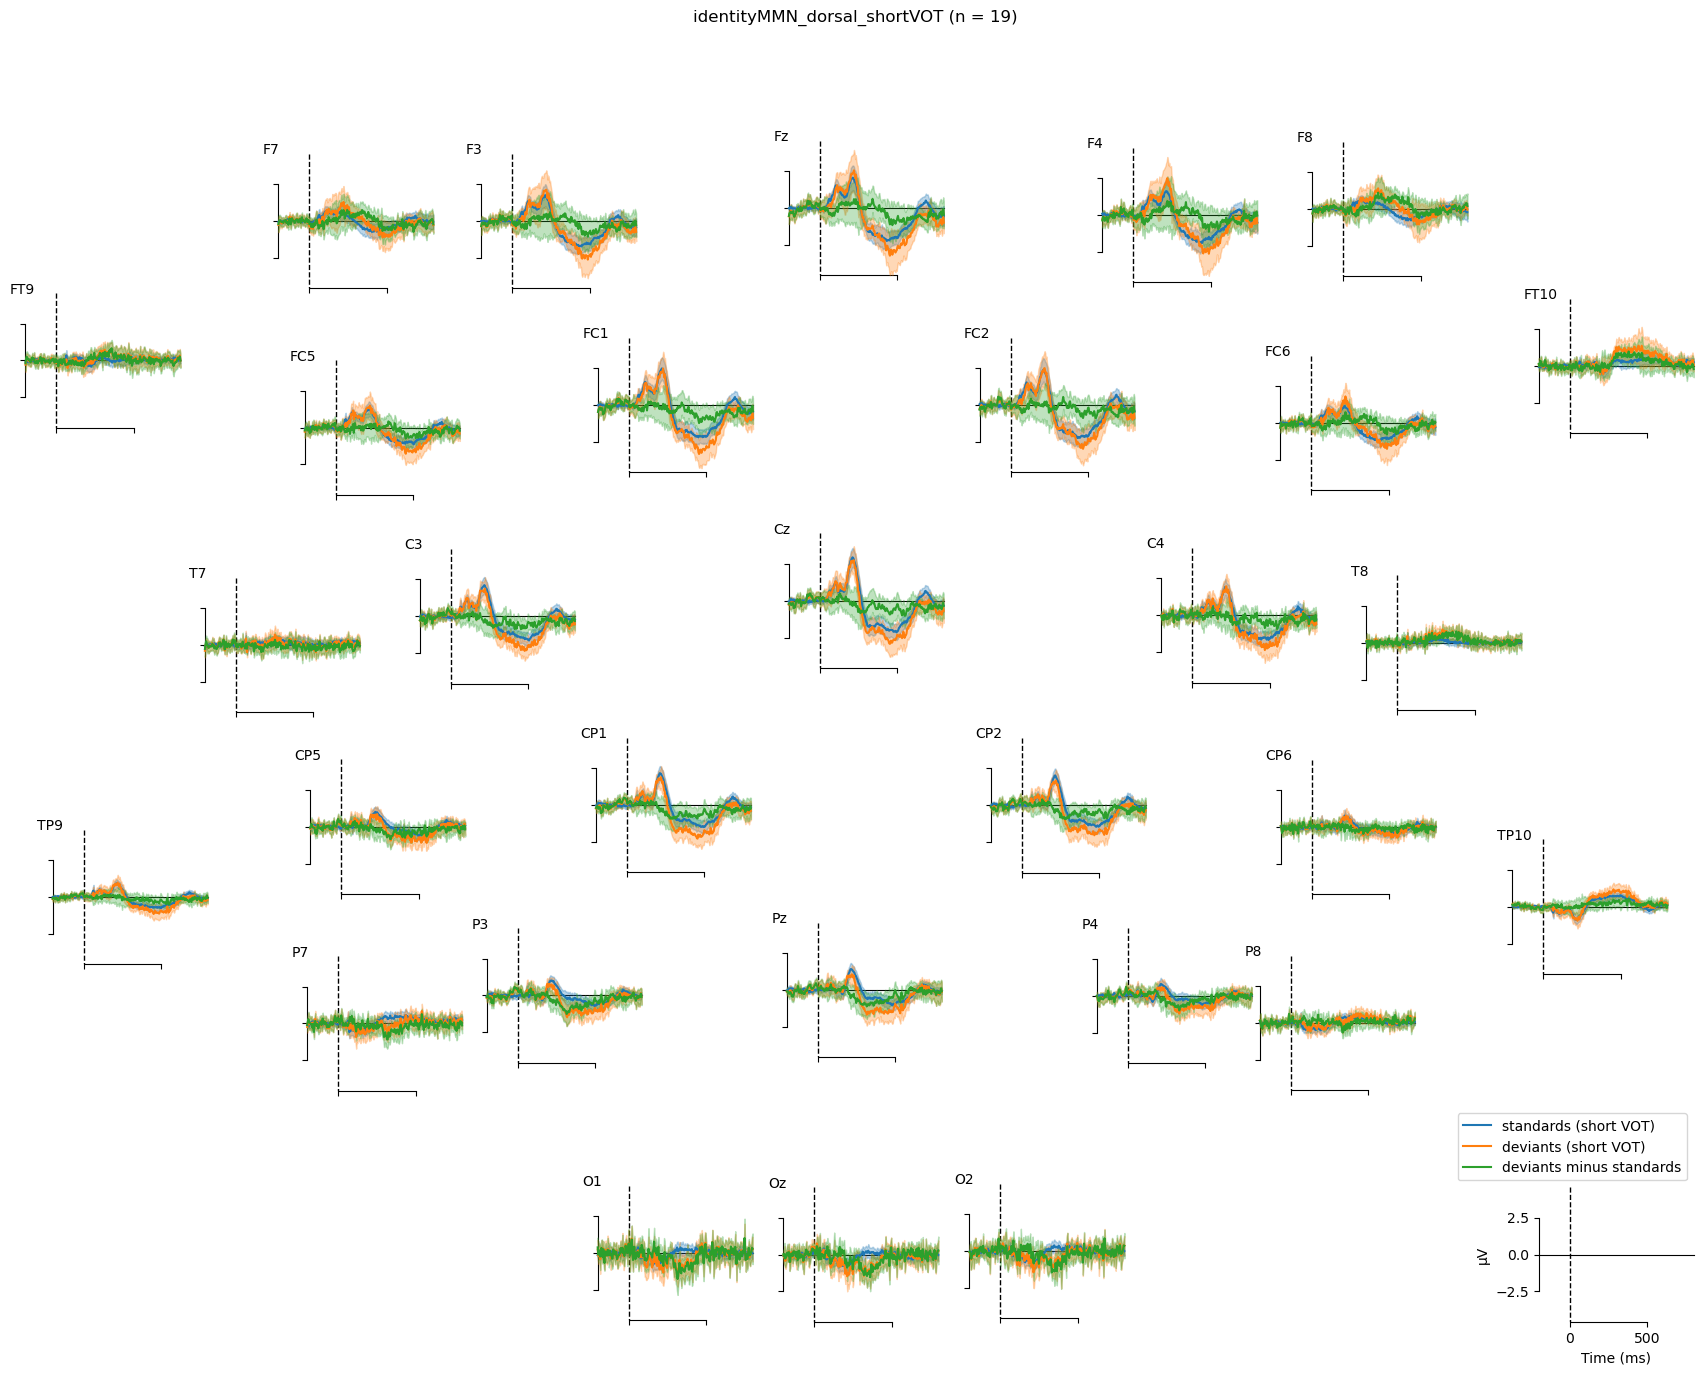

In [25]:
# get participant group info
if cell[-1] == 'T':
    ppt_group = 'VOT'
else:
    ppt_group = 'F0'


# get subset participants for the cell
sub_ppts = []
# for each subject
for ppt in all_ppts:
    # if it is not in the bad subject list # 
    if (ppt.split('_')[1] not in exclude_ppts) and (ppt.split('_')[0]==ppt_group):
        # append that subject to the list
        sub_ppts.append(ppt)


# get legends
legend_stan = cell_dict[ppt_group][cell]['legend'][0]
legend_devi = cell_dict[ppt_group][cell]['legend'][1]
legend_diff = 'deviants minus standards'

# # colors
# color_devi = "crimson"
# color_stan = "steelblue"
# color_diff = 'black'


##########################
####  ERP Topographical subplot and ROI waveforms ####
##########################

# extract ERPs
erp_stan = []
erp_devi = []
erp_diff = []
for ppt in sub_ppts:

    # extract conditions
    conds = all_evokeds[ppt].keys()

    # get standard and deviant keys for pulling out data
    stan_cond_list = [ x for x in conds if x.rsplit('_', 1)[0]==cell_dict[ppt_group][cell]['standard'] ]
    devi_cond_list = [ x for x in conds if x.rsplit('_', 1)[0]==cell_dict[ppt_group][cell]['deviant'] ]

    # compute temporary standard erp
    tmp_stan = mne.combine_evoked([all_evokeds[ppt][x] for x in stan_cond_list],
                                  weights='equal')
    # compute temporary deviant erp
    tmp_devi = mne.combine_evoked([all_evokeds[ppt][x] for x in devi_cond_list],
                                  weights='equal')
    # compute temporary difference erp
    tmp_diff = mne.combine_evoked([tmp_devi, tmp_stan],
                                  weights=[1,-1]) # 1 for devi, -1 for stan
    # append temporary data to list
    erp_stan.append(tmp_stan)
    erp_devi.append(tmp_devi)
    erp_diff.append(tmp_diff)


# combine data for plotting
evokeds = {}
evokeds[legend_stan] = erp_stan
evokeds[legend_devi] = erp_devi
evokeds[legend_diff] = erp_diff

# # set colors
# colors = {}
# colors[legend_stan] = color_stan
# colors[legend_devi] = color_devi
# colors[legend_diff] = color_diff


################################
#### Topographical subplots ####
################################


# figure title for the waveform
waveform_title = cell + ' (n = ' + str(len(sub_ppts)) + ')'

##############################
# waveforms across scalp topo
# NOTE: I don't know how to save these plots using the code
fig = mne.viz.plot_compare_evokeds(
    evokeds,
    axes='topo',
    # picks=pick_chans,
    # combine="mean",
    show_sensors=True,
    # colors=colors,
    title = waveform_title,
    # ylim=dict(eeg=[-5, 5]),
    time_unit="ms",
    show=False,
);
##############################

# Grand-average waves and topos

## parameters

In [32]:
# save the plot?
toggle_save_plot = True
# toggle_save_plot = False

# # colors for each condition?
# color_devi = "crimson"
# color_stan = "steelblue"
# color_diff = 'black'

# times to show in topoplots (in seconds)
times = [0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

# choose a channel(s) for ERP plot
pick_chans = ["Cz", "Fz", "FC1", "FC2", "C3", "C4", "CP1", "CP2"]

# get channel index
ch_inds = np.isin(chan_list, pick_chans)

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 29 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 2 sensors
Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 29 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 2 sensors
Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 29 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 2 sensors
Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


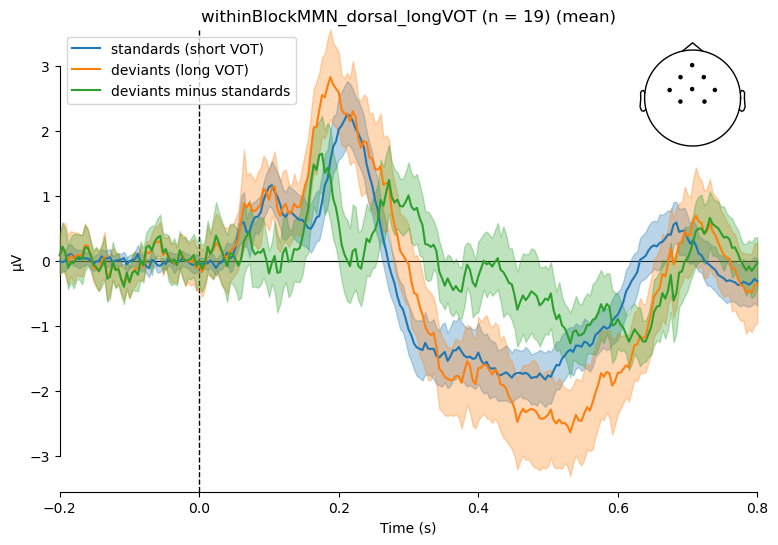

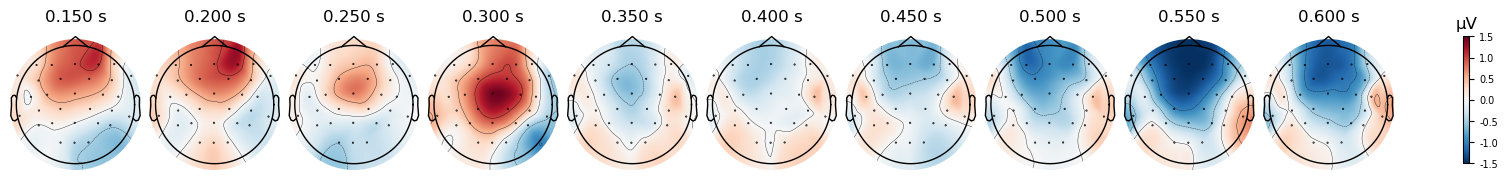

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 29 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 2 sensors
Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


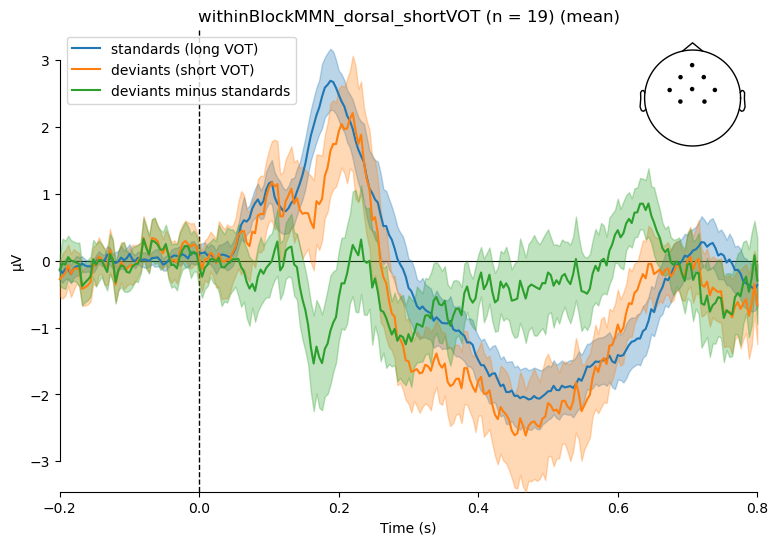

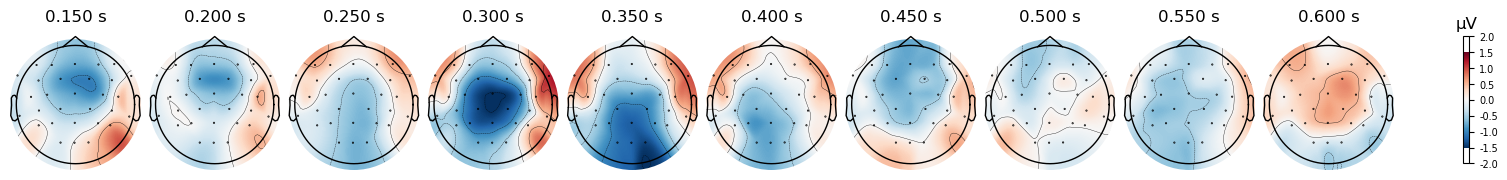

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 29 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 2 sensors
Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


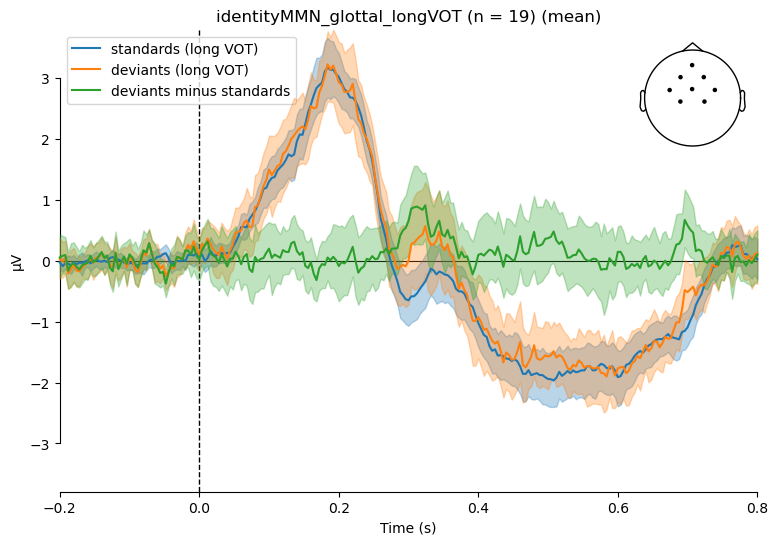

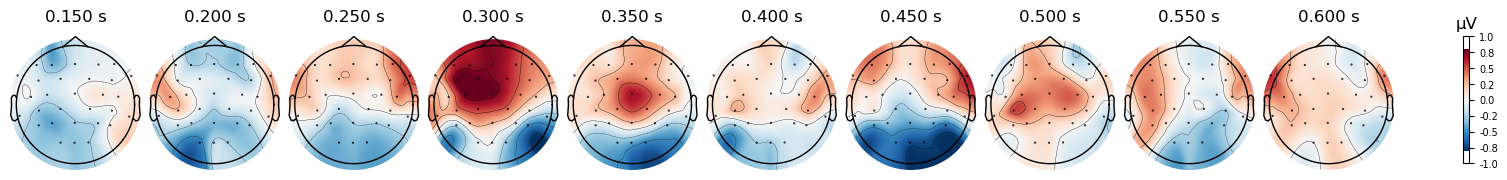

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 29 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 2 sensors
Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


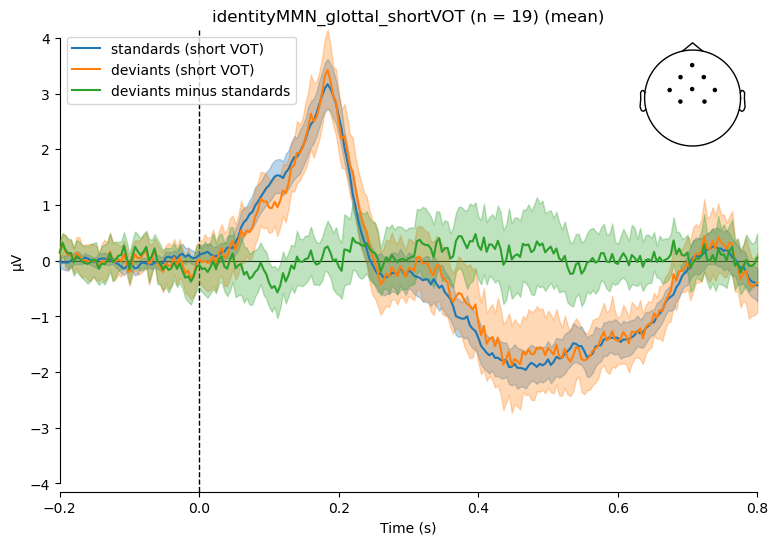

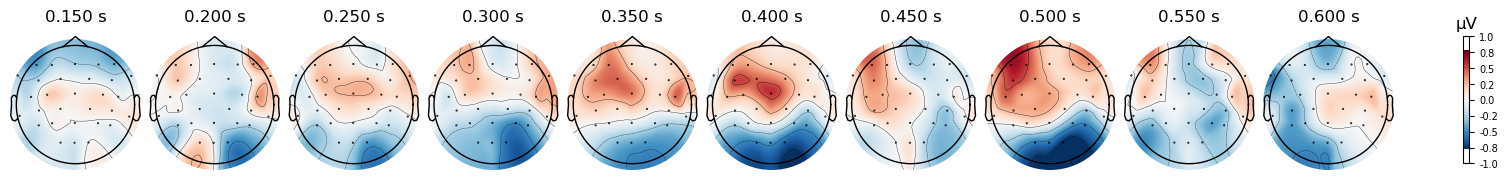

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 29 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 2 sensors
Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


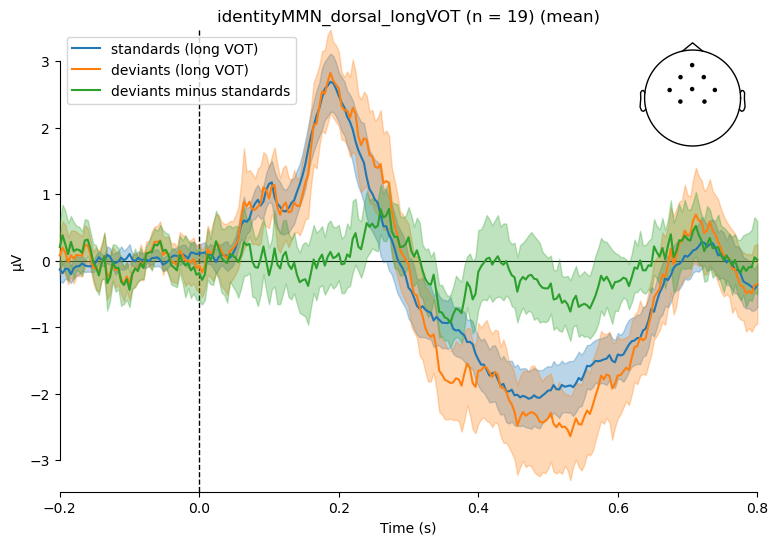

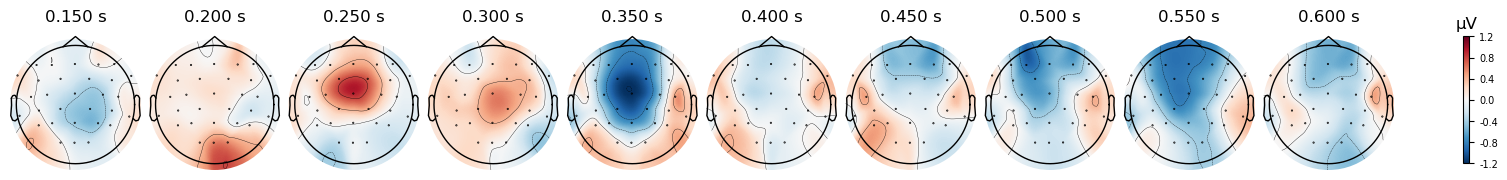

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 29 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 2 sensors
Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


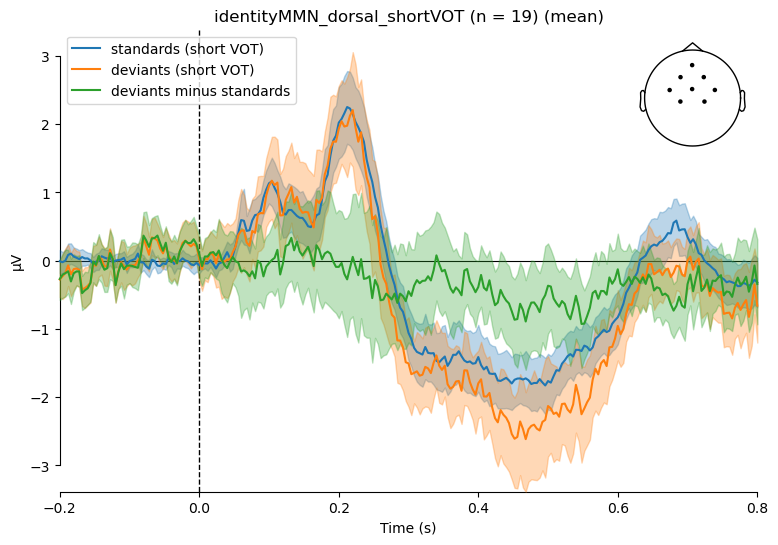

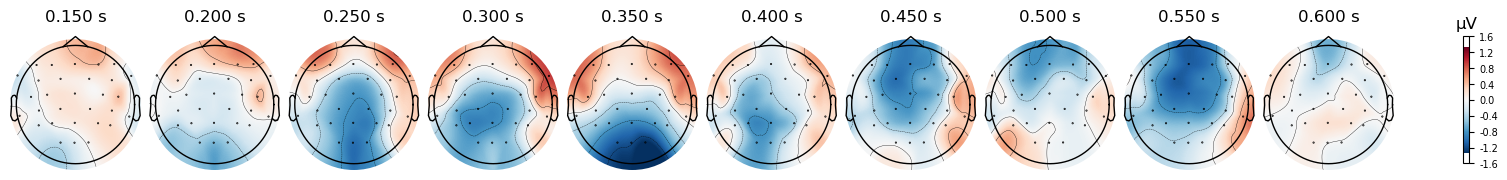

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


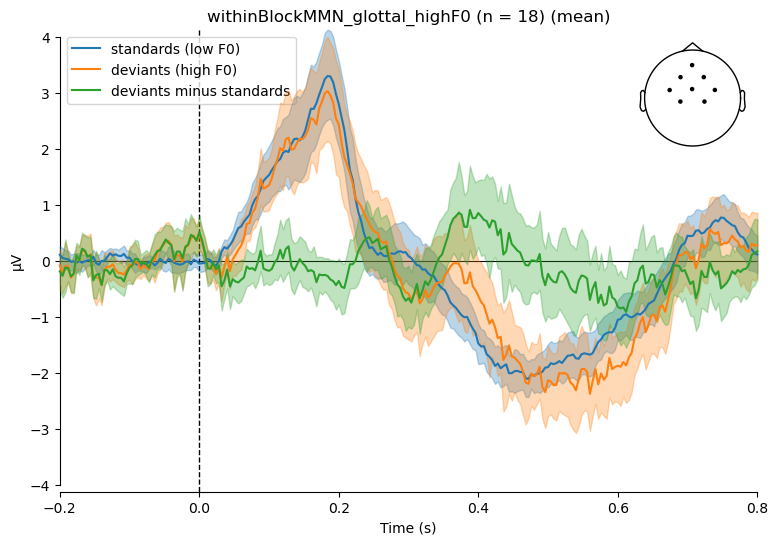

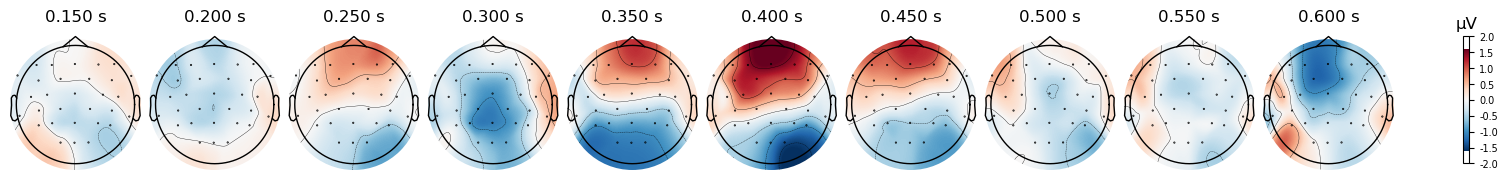

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


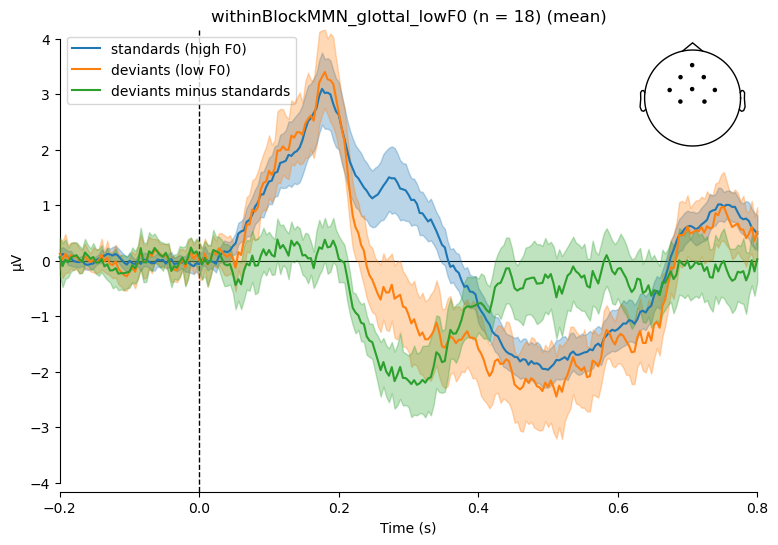

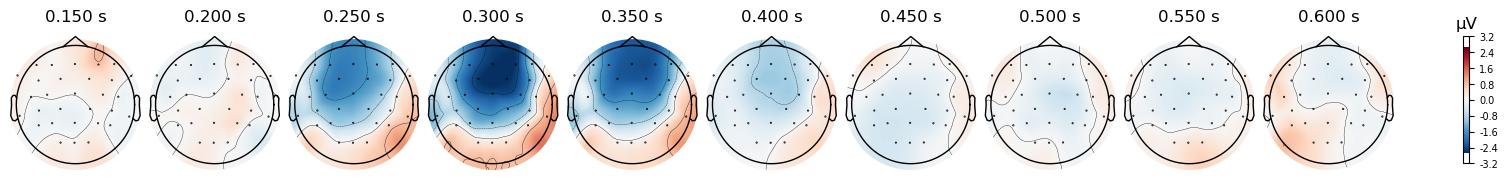

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


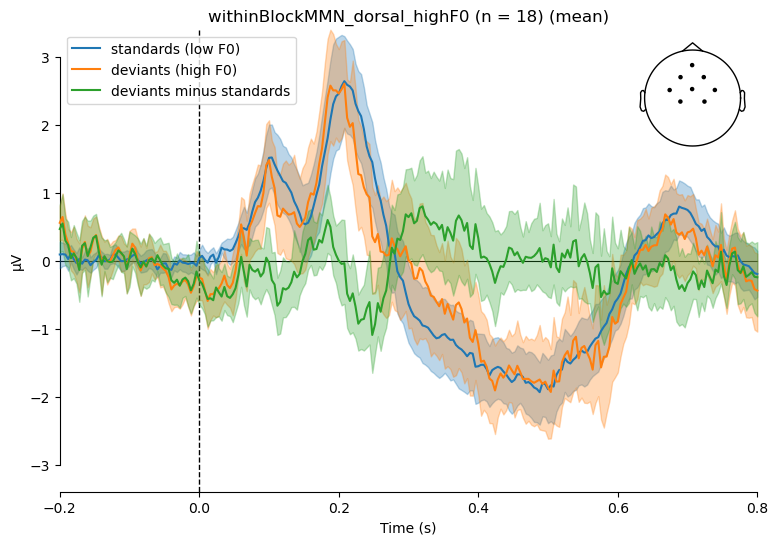

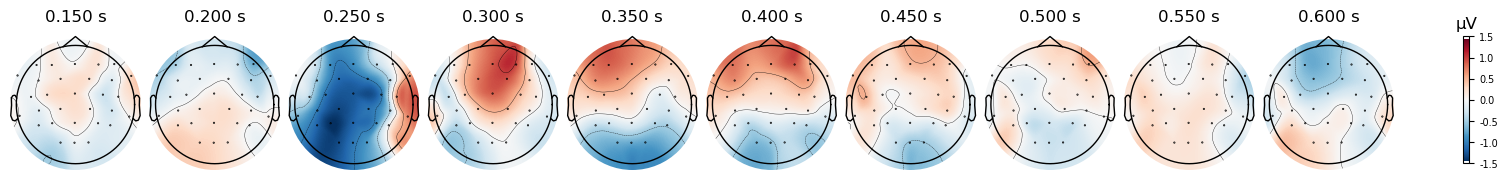

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


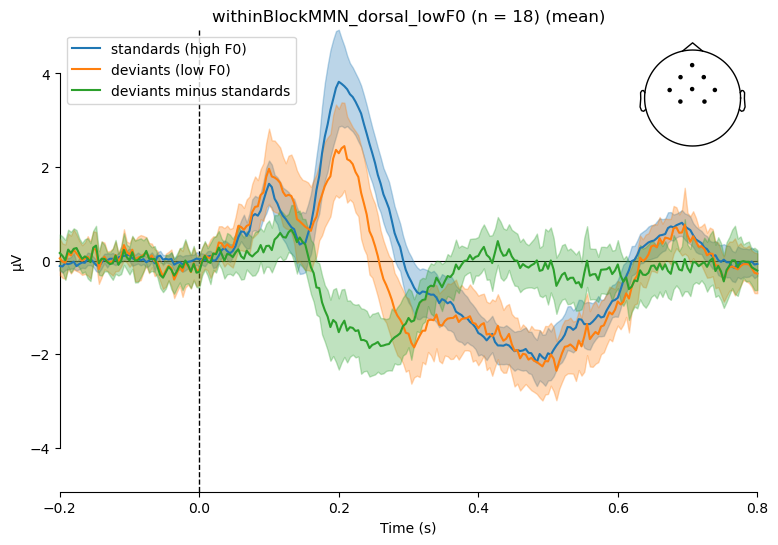

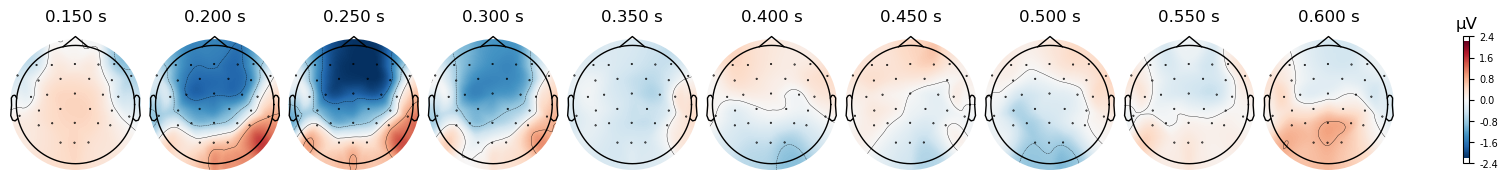

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


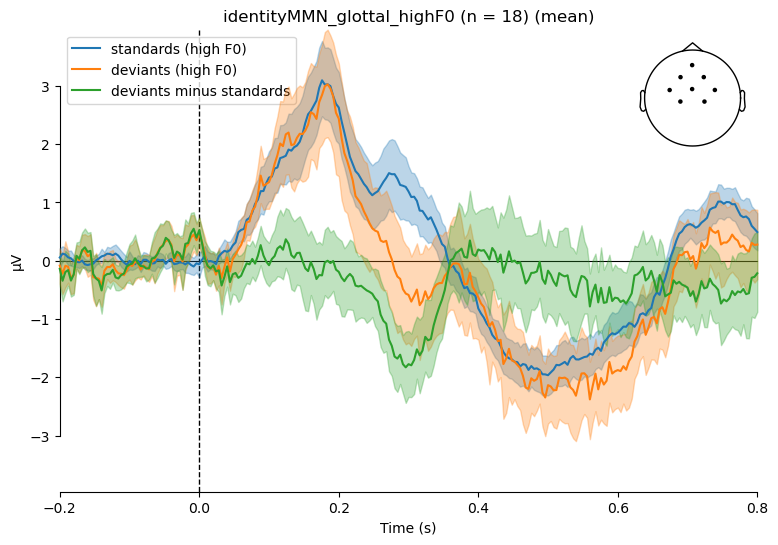

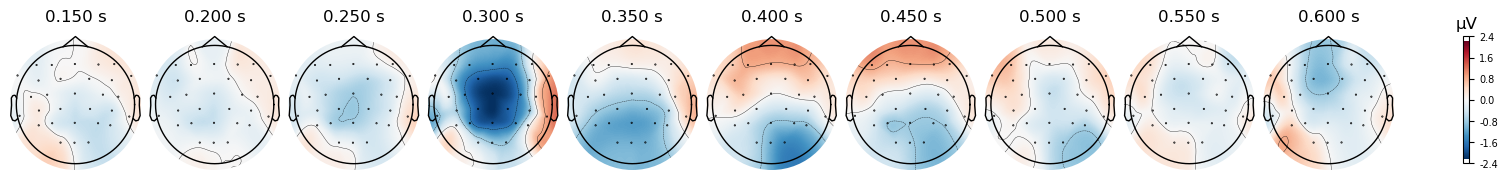

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


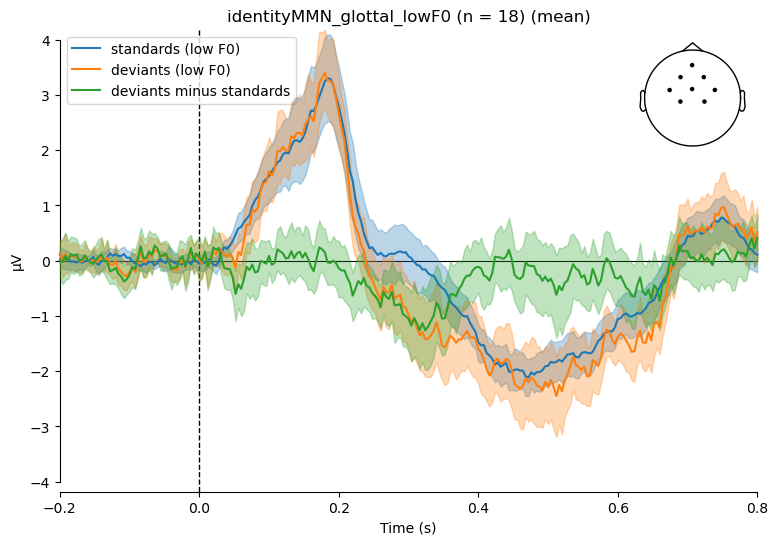

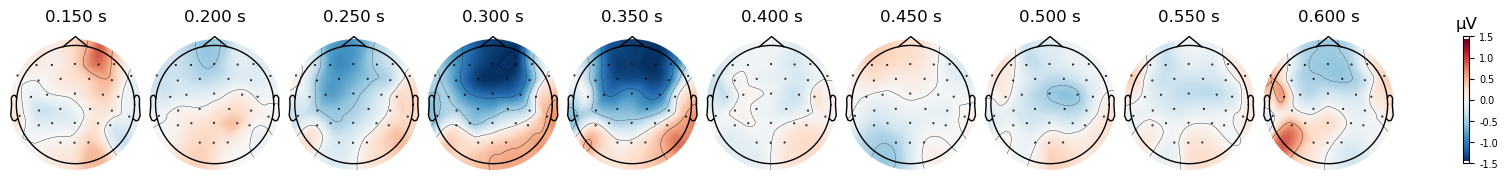

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


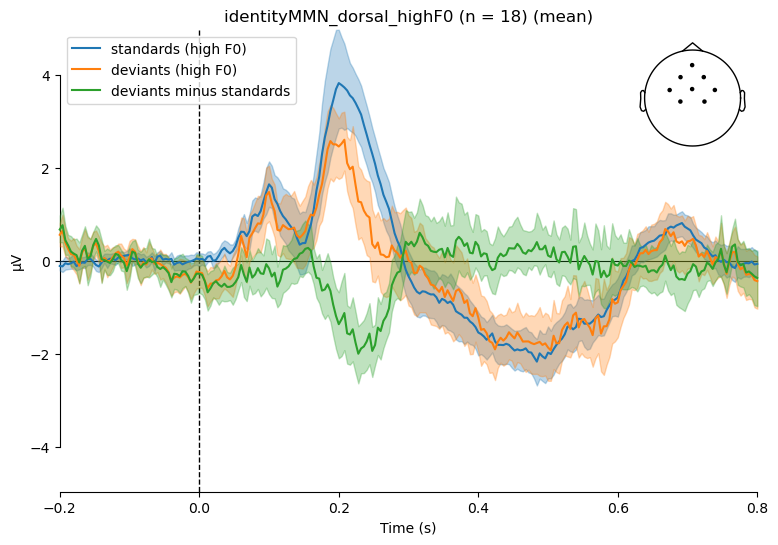

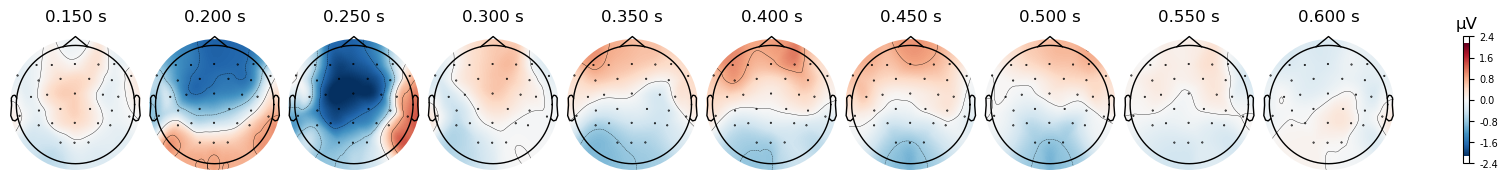

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


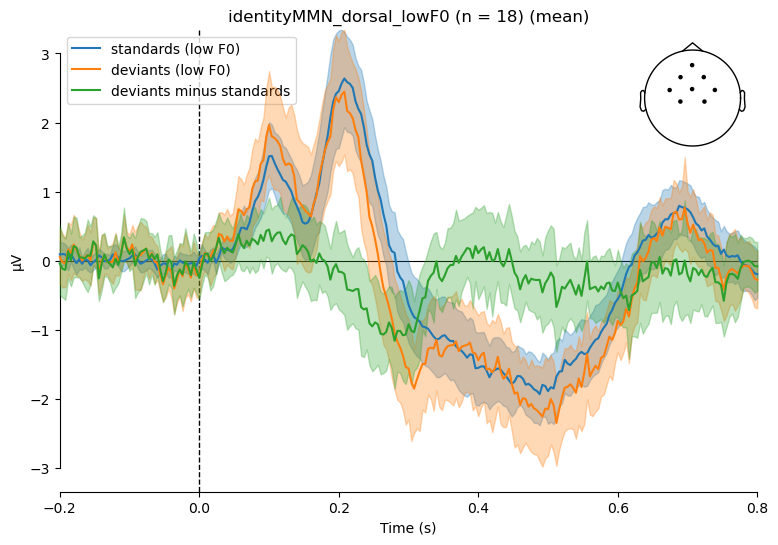

In [33]:
# get the list participants who came this far
all_ppt = list(all_evokeds.keys())


# for each group
for ppt_group in ['VOT', 'F0']:
    # get participant list
    sub_ppts = []
    for ppt in all_ppt:
        # if it is not in the bad subject list # 
        if (ppt.split('_')[1] not in exclude_ppts) and (ppt.split('_')[0]==ppt_group):
            # append that subject to the list
            sub_ppts.append(ppt)

    # for each cell
    for cell in cell_dict[ppt_group].keys():
        
        # get legends
        legend_stan = cell_dict[ppt_group][cell]['legend'][0]
        legend_devi = cell_dict[ppt_group][cell]['legend'][1]
        legend_diff = 'deviants minus standards'
        
        # extract ERPs
    
        # initialize list
        erp_stan = []
        erp_devi = []
        erp_diff = []
    
        # for each subject
        for ppt in sub_ppts:
    
            # extract conditions
            conds = all_evokeds[ppt].keys()
        
            # get standard and deviant keys for pulling out data
            stan_cond_list = [ x for x in conds if x.rsplit('_', 1)[0]==cell_dict[ppt_group][cell]['standard'] ]
            devi_cond_list = [ x for x in conds if x.rsplit('_', 1)[0]==cell_dict[ppt_group][cell]['deviant'] ]
    
            # compute temporary standard erp
            tmp_stan = mne.combine_evoked([all_evokeds[ppt][x] for x in stan_cond_list],
                                          weights='equal')
            # compute temporary deviant erp
            tmp_devi = mne.combine_evoked([all_evokeds[ppt][x] for x in devi_cond_list],
                                          weights='equal')
            # compute temporary difference erp
            tmp_diff = mne.combine_evoked([tmp_devi, tmp_stan],
                                          weights=[1,-1]) # 1 for devi, -1 for stan
            # append temporary data to list
            erp_stan.append(tmp_stan)
            erp_devi.append(tmp_devi)
            erp_diff.append(tmp_diff)
    
    
        # compute grand average of difference waves
        grand_avg_diff = mne.grand_average(erp_diff)
        
        
        # combine data for plotting
        evokeds = {}
        evokeds[legend_stan] = erp_stan
        evokeds[legend_devi] = erp_devi
        evokeds[legend_diff] = erp_diff
        
        # # set colors
        # colors = {}
        # colors[legend_stan] = color_stan
        # colors[legend_devi] = color_devi
        # colors[legend_diff] = color_diff
        
        
        # ################################
        # #### plot gav waveform ####
        # ################################
        
        # figure title for the waveform
        waveform_title = cell + ' (n = ' + str(len(sub_ppts)) + ')'

        wave, ax = plt.subplots(1, 1, figsize=(9, 6))
        
        mne.viz.plot_compare_evokeds(
            evokeds,
            axes=ax,
            picks=pick_chans,
            combine="mean",
            show_sensors=True,
            # colors=colors,
            title = waveform_title,
            # ylim=dict(eeg=[-5, 5]),
            time_unit="s",
            show=False
        )
        # save fig
        if toggle_save_plot:
            wave.savefig(output_dir + '/wave_' + cell +'.png')
        
        
        #### topomap of difference wave (deviants minus standards) ####
        
        #### plotting topo ####
        topo = grand_avg_diff.plot_topomap(
            ch_type="eeg", 
            times=times, 
            colorbar=True,
            # vlim = (-2,2)
        )
        
        # save fig
        if toggle_save_plot:
            topo.savefig(output_dir + '/topo_' + cell +'.png')
        
        
        
        # ##################################################################################
        # # For each subject extract the windows average centering the negative peak latency
        # ##################################################################################
        
    
        # # for each subject 
        # for subj in subset_subs:
        #     # compute temporary standard erp
        #     tmp_stan = all_evokeds[subj][key_stan]
        #     # compute temporary deviant erp
        #     tmp_devi = all_evokeds[subj][key_devi]
        #     # compute temporary difference erp
        #     tmp_diff = mne.combine_evoked(
        #         [tmp_devi, tmp_stan],
        #         weights=[1,-1] # 1 for devi, -1 for stan
        #     )
    
            # ##################################
            # #### plot individual waveform ####
    
            # # combine data for plotting
            # evokeds = {}
            # evokeds[legend_stan] = tmp_stan
            # evokeds[legend_devi] = tmp_devi
            # evokeds[legend_diff] = tmp_diff
            
            # # set colors
            # colors = {}
            # colors[legend_stan] = color_stan
            # colors[legend_devi] = color_devi
            # colors[legend_diff] = color_diff
            
            # # figure title for the waveform
            # waveform_title = subj + " " + cell_i
            
            # # figure axes
            # indi_fig, indi_ax = plt.subplots(
            #     1, 1, 
            #     figsize=(7, 5),
            #     layout="constrained"
            # )
            # mne.viz.plot_compare_evokeds(
            #     evokeds,
            #     axes=indi_ax,
            #     picks=pick_chans,
            #     combine="mean",
            #     show_sensors=True,
            #     colors=colors,
            #     title = waveform_title,
            #     # ylim=dict(eeg=[-5, 5]),
            #     time_unit="ms",
            #     show=False,
            # )
            # plt.close()
            
            # # save fig
            # if toggle_save_plot:
            #     indi_fig.savefig(output_dir_individual + '/' + subj + "_" + cell_i +'.png')
            # ##############################


#### combine F0 figures into one ####
image_files = {
    'f0': [
        'wave_identityMMN_dorsal_highF0',
        'wave_identityMMN_dorsal_lowF0',
        'wave_identityMMN_glottal_highF0',
        'wave_identityMMN_glottal_lowF0',
        'wave_withinBlockMMN_dorsal_highF0',
        'wave_withinBlockMMN_dorsal_lowF0',
        'wave_withinBlockMMN_glottal_highF0',
        'wave_withinBlockMMN_glottal_lowF0',
    ],
    'vot': [
        'wave_identityMMN_dorsal_longVOT',
        'wave_identityMMN_dorsal_shortVOT',
        'wave_identityMMN_glottal_longVOT',
        'wave_identityMMN_glottal_shortVOT',
        'wave_withinBlockMMN_dorsal_longVOT',
        'wave_withinBlockMMN_dorsal_shortVOT',
        'wave_withinBlockMMN_glottal_longVOT',
        'wave_withinBlockMMN_glottal_shortVOT',        
    ]
}

# combine figures
for group in ['f0', 'vot']:
    # initialize
    fig, axes = plt.subplots(4, 2, figsize=(15, 20))
    axes = axes.flatten()
    # read in image and combine
    for ax, file_name in zip(axes, image_files[group]):
        img = mpimg.imread(output_dir + '/' + file_name + '.png')
        ax.imshow(img)
        ax.axis('off')  # Hide axes
    # save
    plt.tight_layout()
    plt.savefig(output_dir + '/wave_combined_' + group + '.png', dpi=300)
    plt.close()
########################################

# Extract data for GAM

In [113]:
# get subset participants for the cell
sub_ppts = []
# for each subject
for ppt in all_ppts:
    # if it is not in the bad subject list # 
    if (ppt.split('_')[1] not in exclude_ppts):
        # append that subject to the list
        sub_ppts.append(ppt)

# choose a channel(s) for data extraction
pick_chans = ["Cz", "Fz", "FC1", "FC2", "C3", "C4", "CP1", "CP2"]
# get channel indices
chan_inds = np.isin(chan_list, pick_chans)

# for each group
for group in ['VOT', 'F0']:

    # initialize list for rows
    rows = []

    # for each participant
    for ppt in sub_ppts:
        # check subject group
        if ppt.split('_')[0]==group:
            # get conditions
            for cond in all_evokeds[ppt].keys():
                # erp
                tmp = all_evokeds[ppt][cond]
                # average over channels
                tmp = tmp.get_data()[chan_inds, :].mean(axis = 0) * 1e6
                # convert to dictionary
                tmp = dict(zip(time_labels, tmp))
                # make a row
                tmp = {'group': group, 'participant': ppt, 'condition': cond} | tmp
                # append
                rows.append(tmp)

    # convert to panda dataframe
    df = pd.DataFrame(rows)
    # save
    df.to_csv('../analysis data/GAM/gam_' + group + '.csv', index=False)

# spatiotemporal cluter-based permutation analysis

In [125]:
############################
#### Parameters ############
############################

# get one epoch/eoviked info
evoked = all_evokeds['F0_0002']['dorsal_highStan_lowDevi-devi']

# get the list of all subjects that came this far
all_subs = list(all_evokeds.keys())

# subject group
subj_group = ['VOT']
# subj_group = ['F0']
# subj_group = ['VOT', 'F0']
           

# subject list
subset_subs = []
# for each subject
for i_subj in all_subs:
    # if it is not in the bad subject list # 
    if (i_subj.split('_')[1] not in exclude_subs) and (i_subj.split('_')[0] in subj_group):
        # append that subject to the list
        subset_subs.append(i_subj)

# ##############
# # extract ERPs
# erp_diff = []
# for subj in subset_subs:
#     # compute temporary difference erp
#     tmp_diff = mne.combine_evoked(
#         [ all_evokeds[subj][key_devi[0]], all_evokeds[subj][key_stan[0]]] ],
#         weights=[1,-1] # 1 for devi, -1 for stan
#     )
#     # append temporary data to list
#     erp_diff.append(tmp_diff)
# ################

###############
# extract ERPs
erp_stan = []
erp_devi = []
erp_diff = []
for subj in subset_subs:
    # compute temporary difference erp
    tmp_stan = mne.combine_evoked([
        all_evokeds[subj]['dorsal_highStan_lowDevi-stan'],
        all_evokeds[subj]['dorsal_lowStan_highDevi-stan'],
        # all_evokeds[subj]['glottal_highStan_lowDevi-stan'],
        # all_evokeds[subj]['glottal_lowStan_highDevi-stan']
    ],
                                  weights='equal')
    tmp_devi = mne.combine_evoked([
        all_evokeds[subj]['dorsal_lowStan_highDevi-devi'],
        all_evokeds[subj]['dorsal_highStan_lowDevi-devi'],
        # all_evokeds[subj]['glottal_lowStan_highDevi-devi'],
        # all_evokeds[subj]['glottal_highStan_lowDevi-devi']
    ],
                                  weights='equal')
    tmp_diff = mne.combine_evoked([tmp_stan, tmp_devi],
                                   weights=[-1, 1])
    
    # append temporary data to list
    erp_stan.append(tmp_stan)
    erp_devi.append(tmp_devi)
    erp_diff.append(tmp_diff)
#####################


###################################
#### Find the adjacency matrix ####
###################################
# get channel info
adjacency, chan_names = mne.channels.find_ch_adjacency(evoked.info, 'eeg')

# # # visualize
# mne.viz.plot_ch_adjacency(epochs.info, chan_adj, chan_names)
# plt.show()


#####################
#### compute MMN ####
#####################


# extract data for stats
erp_diff_data = np.stack([x.get_data() for x in erp_diff], axis=0)

# # check the shape
# print(erp_diff_data.shape)


# reshape the data for stats analysis
X = np.transpose(erp_diff_data, [0, 2, 1]) # output: subject x time x channel

# print(X.shape)


###################################
#### cluster-based permutation ####
###################################

# Here we set a cluster forming threshold based on a p-value for
# the cluster based permutation test.
# We use a two-tailed threshold, the "1 - p_threshold" is needed
# because for two-tailed tests we must specify a positive threshold.
n_subjects = X.shape[0]
p_threshold = 0.01
df = n_subjects - 1  # degrees of freedom for the test
t_threshold = stats.distributions.t.ppf(1 - p_threshold/2, df=df)


# Now let's actually do the clustering.
T_obs, clusters, cluster_p_values, H0 = mne.stats.spatio_temporal_cluster_1samp_test(
    X,
    adjacency=adjacency,
    n_jobs=None,
    threshold=t_threshold,
    # threshold=None,
    buffer_size=None,
    verbose=True,
    # tail = -1, # one-tail test
    seed = 42 # set random seed
)

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 32
stat_fun(H1): min=-3.7791711038268083 max=3.707151561702316
Running initial clustering …
Found 15 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

In [22]:
#########################
#### select clusters ####
#########################

# Select the clusters that are statistically significant at p < 0.05
p_accept = 0.01
good_clusters_idx = np.where(cluster_p_values < p_accept)[0]

print(good_clusters_idx)

[]


combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


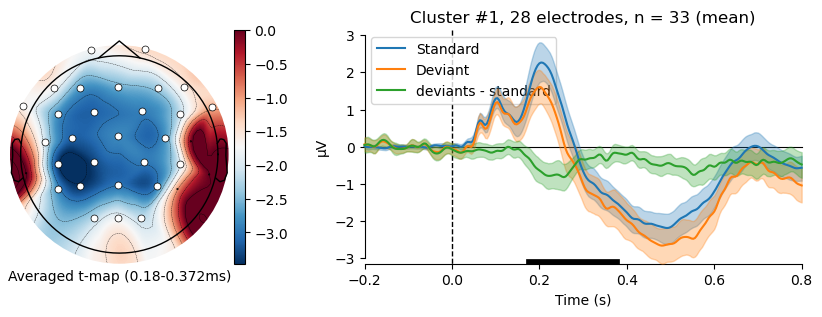

In [140]:
#######################
#### visualization ####
#######################

#### parameter ####
toggle_save_plot = False

# pick_chans = ['Cz']

# What legend do you want to give to each type of stimuli? It shows in plots
legend_devi = 'Deviant'
legend_stan = 'Standard'
legend_diff = 'deviants - standard'


# combine data for plotting
evokeds = {}
evokeds[legend_stan] = erp_stan
evokeds[legend_devi] = erp_devi
evokeds[legend_diff] = erp_diff


# # set colors
# colors = {}
# colors[legend_stan] = color_stan
# colors[legend_devi] = color_devi


#### prepare data for topo plotting ####


## visualize clusters

if len(good_clusters_idx) > 0:
    

    # loop over clusters
    for i_clu, clu_idx in enumerate(good_clusters_idx):
        # unpack cluster information, get unique indices
        time_inds, space_inds = np.squeeze(clusters[clu_idx])

        # get channel indices
        ch_inds = np.unique(space_inds)
        # convert it to panda dataframe and save as .txt
        df = pd.DataFrame(ch_inds+1)
        # df.to_csv('input/stats_channel_index_' + subj_group + '_All_blocks_cluster' + str(i_clu) + '.txt', header=False, index=False)
        # df.to_csv('input/stats_channel_index_' + subj_group + '_' + devi_key + '_minus_' + stan_key + '_cluster' + str(i_clu) + '.txt', header=False, index=False)
        
        # get time indices
        time_inds = np.unique(time_inds)
        
        # convert it to panda dataframe and save as .txt
        # df = pd.DataFrame(time_inds+1)
        # df.to_csv('input/stats_time_index_' + subj_group + '_All_blocks_cluster' + str(i_clu) + '.txt', header=False, index=False)
        # df.to_csv('input/stats_time_index_' + subj_group + '_' + devi_key + '_minus_' + stan_key + '_cluster' + str(i_clu) + '.txt', header=False, index=False)
        
        
        # get topography for F stat
        t_map = T_obs[time_inds, ...].mean(axis=0)

        # get signals at the sensors contributing to the cluster
        sig_times = evoked.times[time_inds]

        # create spatial mask
        mask = np.zeros((t_map.shape[0], 148), dtype=bool) # the number is obtained based on the error message, I don't know how to decide this number.
        mask[ch_inds, :] = True

        # initialize figure
        fig, ax_topo = plt.subplots(1, 1, figsize=(8, 8), layout="constrained")

        # plot topos of average test statistic and mark significant sensors
        t_evoked = mne.EvokedArray(t_map[:, np.newaxis]/1e6, evoked.info, tmin=0)
        t_evoked.plot_topomap(
            times=0,
            mask=mask,
            axes=ax_topo,
            # cmap="jet",
            vlim=(np.min, np.max),
            show=False,
            colorbar=False,
            mask_params=dict(markersize=10),
        )
        image = ax_topo.images[0]

        # remove the title that would otherwise say "0.000 s"
        ax_topo.set_title("")

        # create additional axes (for ERF and colorbar)
        divider = make_axes_locatable(ax_topo)

        # add axes for colorbar
        ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(image, cax=ax_colorbar)
        ax_topo.set_xlabel(
            "Averaged t-map ({:}-{:}ms)".format(*sig_times[[0, -1]])
        )

        # add new axis for time courses and plot time courses
        ax_signals = divider.append_axes("right", size="200%", pad=1.2)
        
        title = f"Cluster #{i_clu + 1}, {len(ch_inds)} electrodes, n = {len(subset_subs)}"

        # plot waveforms
        plot_compare_evokeds(
            evokeds,
            title=title,
            picks=ch_inds,
            axes=ax_signals,
            # colors=colors,
            # linestyles=linestyles,
            show=False,
            split_legend=True,
            truncate_yaxis="auto",
            combine="mean",
        )
        

        # plot temporal cluster extent
        ymin, ymax = ax_signals.get_ylim()
        ax_signals.plot(sig_times, [ymin]*len(sig_times), '-', color='k', linewidth=7)


        # save
        if toggle_save_plot:
            fig.savefig(output_dir + 'permutation_' + '_cluster' + str(i_clu) + '.png')



        # #### plotting topo of voltage ####
        # # figure axes
        # fig, ax = plt.subplots(1, 1, figsize=(3, 3))
        # ax_topo = fig.add_axes([0.9, 0.1, 0.05, 0.7])

        # t_evoked = mne.EvokedArray(t_map[:, np.newaxis], epoch_info.info, tmin=0)
        # t_evoked.plot_topomap(
        #     times=0,
        #     mask=mask,
        #     mask_params=dict(markersize=6 ),
        #     axes=[ax, ax_topo],
        #     # cmap="jet",
        #     vlim=(np.min, np.max),
        #     show=False,
        #     colorbar=True,
        # )
        
        # ax_topo.set_title("Your Title", fontsize=14)
        # ax.set_title('{:}-{:}ms'.format(int(sig_times[0]*1000), int(sig_times[-1]*1000)), fontsize=10)

    
        # save fig
        # if toggle_save_plot:
        #     fig.savefig(output_dir + 'permutation_voltage_topo_' + subj_group + '_' + 'cluster' + str(i_clu) + '.png', bbox_inches='tight')
    
    # plt.show()

In [469]:
###############
# save sig data
###############

# choose a channel(s) for ERP plot
pick_chans = ["Cz", "Fz", "FC1", "FC2", "C3", "C4", "CP1", "CP2"]
# pick_chans = ["Cz", "Fz"]
# pick_chans = ["Cz"]
# pick_chans = ["Fz"]


# read in the list of channel names
with open("../analysis data/channel_names.txt", "r") as file:
    chan_list = [line.strip() for line in file]
# get channel index
ch_inds = np.isin(chan_list, pick_chans)


# loop over clusters
for i_clu, clu_idx in enumerate(good_clusters_idx):
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])

    # get channel indices
    # ch_inds = np.unique(space_inds)
    
    # get time indices
    time_inds = np.unique(time_inds)
    
    # for each group
    for group in ['VOT', 'F0']:

        # initialize list for panda data frame
        pd_list = [] 

        # for each subject
        for subj in subset_subs:
    
            # check subject group
            if subj.split('_')[0]==group:
    
                # initial subject-level dictionary
                subj_dict = {'subject': subj}
                # extract condition
                for cond in cell_dict[group].keys():
                    # get standard and deviant keys for pulling out data
                    key_stan = cell_dict[group][cond][0]
                    key_devi = cell_dict[group][cond][1]
                    erp_diff = mne.combine_evoked([ all_evokeds[subj][key_devi], all_evokeds[subj][key_stan] ],
                                                  weights=[1, -1])
                    # channel average
                    avg = np.mean( erp_diff.get_data()[ch_inds, :], axis = 0 )
                    # time average
                    avg = np.mean( avg[time_inds] )
                    # sacle to microvolt
                    mmn = avg * 1e6
                    # add to subject dictionary
                    subj_dict[cond] = mmn
                    
                # append to the list
                pd_list.append(subj_dict)

        # get panda data
        df = pd.DataFrame(pd_list)

        # save
        time_window = str(evoked.times[time_inds[0]]) + '_' + str(evoked.times[time_inds[-1]])
        df.to_csv('../analysis data/' + savefolder + '/mmn_' + group + '_' + time_window + '.txt', index=False)

TypeError: iteration over a 0-d array

# temporal cluster-based permutation

In [368]:
############################
#### Parameters ############
############################

# get one epoch/eoviked info
evoked = all_evokeds['F0_0002']['dorsal_highStan_lowDevi-devi']

# get the list of all subjects that came this far
all_subs = list(all_evokeds.keys())

# subject group
# subj_group = ['VOT']
# subj_group = ['F0']
subj_group = ['VOT', 'F0']

# subject list
subset_subs = []
# for each subject
for i_subj in all_subs:
    # if it is not in the bad subject list # 
    if (i_subj.split('_')[1] not in exclude_subs) and (i_subj.split('_')[0] in subj_group):
        # append that subject to the list
        subset_subs.append(i_subj)

# ##############
# # extract ERPs
# erp_diff = []
# for subj in subset_subs:
#     # compute temporary difference erp
#     tmp_diff = mne.combine_evoked(
#         [ all_evokeds[subj][key_devi[0]], all_evokeds[subj][key_stan[0]]] ],
#         weights=[1,-1] # 1 for devi, -1 for stan
#     )
#     # append temporary data to list
#     erp_diff.append(tmp_diff)
# ################

###############
# extract ERPs
erp_stan = []
erp_devi = []
erp_diff = []
for subj in subset_subs:
    # compute temporary difference erp
    tmp_stan = mne.combine_evoked([
        all_evokeds[subj]['dorsal_highStan_lowDevi-stan'],
        all_evokeds[subj]['dorsal_lowStan_highDevi-stan'],
        all_evokeds[subj]['glottal_highStan_lowDevi-stan'],
        all_evokeds[subj]['glottal_lowStan_highDevi-stan']
    ],
                                  weights='equal')
    tmp_devi = mne.combine_evoked([
        all_evokeds[subj]['dorsal_lowStan_highDevi-devi'],
        all_evokeds[subj]['dorsal_highStan_lowDevi-devi'],
        all_evokeds[subj]['glottal_lowStan_highDevi-devi'],
        all_evokeds[subj]['glottal_highStan_lowDevi-devi']
    ],
                                  weights='equal')
    
    tmp_diff = mne.combine_evoked([tmp_stan, tmp_devi],
                                   weights=[-1, 1])
    
    # append temporary data to list
    erp_stan.append(tmp_stan)
    erp_devi.append(tmp_devi)
    erp_diff.append(tmp_diff)
#####################


###################################
#### Find the adjacency matrix ####
###################################
# get channel info
# adjacency, chan_names = mne.channels.find_ch_adjacency(evoked.info, 'eeg')

# # # visualize
# mne.viz.plot_ch_adjacency(epochs.info, chan_adj, chan_names)
# plt.show()


#####################
#### compute MMN ####
#####################
# choose a channel(s) for ERP plot
pick_chans = ["Cz", "Fz", "FC1", "FC2", "C3", "C4", "CP1", "CP2"]
# pick_chans = ["Cz", "Fz"]
# pick_chans = ["Cz"]



# read in the list of channel names
with open("../analysis data/channel_names.txt", "r") as file:
    chan_list = [line.strip() for line in file]
# get channel index
chan_inds = np.isin(chan_list, pick_chans)


# extract data for stats
X = np.stack([x.get_data()[chan_inds, :].mean(axis=0) for x in erp_diff], axis=0)

# # # check the shape
# # print(erp_diff_data.shape)


# # reshape the data for stats analysis
# X = np.transpose(erp_diff_data, [0, 2, 1]) # output: subject x time x channel

# print(X.shape)

###################################
#### cluster-based permutation ####
###################################


p_thresh = 0.01  # arbitrary
n_observations = X.shape[0]
df = n_observations - 1  # degrees of freedom for the test

# two-tailed test
tail = 0
t_thresh = stats.t.ppf(1 - p_thresh / 2, df)

# # one tail, 1 for higher tail, -1 for lower tail
# tail = -1
# t_thresh = stats.t.ppf(p_thresh, df)


# Run the analysis
T_obs, clusters, cluster_p_values, H0 = mne.stats.spatio_temporal_cluster_1samp_test(
    X,
    threshold=t_thresh,
    tail=tail,
    # adjacency=adjacency,
    out_type="mask",
    verbose=True,
    seed = 42 # set random seed
)

stat_fun(H1): min=-4.535701656219668 max=2.294645360173118
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

In [370]:
#########################
#### select clusters ####
#########################

# Select the clusters that are statistically significant at p < 0.05
p_accept = 0.05
good_clusters_idx = np.where(cluster_p_values < p_accept)[0]

print(good_clusters_idx)

[0 2]


In [372]:
times = time_labels
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(8, 4))
ax.set_title("n: " + str(n_observations))
ax.plot(
    times,
    X.mean(axis=0),
    label="difference",
)

ax.set_ylabel("this is y-label")
ax.legend()

for i_c, c in enumerate(clusters):
    c = c[0]
    if cluster_p_values[i_c] <= p_accept:
        h = ax2.axvspan(times[c.start], times[c.stop - 1], color="r", alpha=0.3)
    else:
        ax2.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3), alpha=0.3)

hf = plt.plot(times, T_obs, "g")
ax2.legend((h,), ("cluster p-value < 0.05",))
ax2.set_xlabel("time (ms)")
ax2.set_ylabel("t-values")

Text(0, 0.5, 't-values')

In [374]:
###############
# save sig data
###############

cell_dict = {
    'VOT': {
        'withinBlockMMN_glottal_longVOT': [
            'glottal_lowStan_highDevi-stan', 'glottal_lowStan_highDevi-devi', # key
            'standards (short VOT)', 'deviants (long VOT)' # legend
        ],
        'withinBlockMMN_glottal_shortVOT': [
            'glottal_highStan_lowDevi-stan', 'glottal_highStan_lowDevi-devi', # key
            'standards (long VOT)', 'deviants (short VOT)' # legend
        ],
        'withinBlockMMN_dorsal_longVOT': [
            'dorsal_lowStan_highDevi-stan', 'dorsal_lowStan_highDevi-devi', # key
            'standards (short VOT)', 'deviants (long VOT)' # legend
        ],
        'withinBlockMMN_dorsal_shortVOT': [
            'dorsal_highStan_lowDevi-stan', 'dorsal_highStan_lowDevi-devi', # key
            'standards (long VOT)', 'deviants (short VOT)' # legend
        ],
        'identityMMN_glottal_longVOT': [
            'glottal_highStan_lowDevi-stan', 'glottal_lowStan_highDevi-devi', # key
            'standards (long VOT)', 'deviants (long VOT)' # legend
        ],
        'identityMMN_glottal_shortVOT': [
            'glottal_lowStan_highDevi-stan', 'glottal_highStan_lowDevi-devi', # key
            'standards (short VOT)', 'deviants (short VOT)' # legend
        ],
        'identityMMN_dorsal_longVOT': [
            'dorsal_highStan_lowDevi-stan', 'dorsal_lowStan_highDevi-devi', # key
            'standards (long VOT)', 'deviants (long VOT)' # legend
        ],
        'identityMMN_dorsal_shortVOT': [
            'dorsal_lowStan_highDevi-stan', 'dorsal_highStan_lowDevi-devi', # key
            'standards (short VOT)', 'deviants (short VOT)' # legend
        ]
    },
    
    'F0': {
        'withinBlockMMN_glottal_highF0': [
            'glottal_lowStan_highDevi-stan', 'glottal_lowStan_highDevi-devi', # key
            'standards (low F0)', 'deviants (high F0)' # legend
        ],
        'withinBlockMMN_glottal_lowF0': [
            'glottal_highStan_lowDevi-stan', 'glottal_highStan_lowDevi-devi', # key
            'standards (high F0)', 'deviants (low F0)' # legend
        ],
        'withinBlockMMN_dorsal_highF0': [
            'dorsal_lowStan_highDevi-stan', 'dorsal_lowStan_highDevi-devi', # key
            'standards (low F0)', 'deviants (high F0)' # legend
        ],
        'withinBlockMMN_dorsal_lowF0': [
            'dorsal_highStan_lowDevi-stan', 'dorsal_highStan_lowDevi-devi', # key
            'standards (high F0)', 'deviants (low F0)' # legend
        ],
        'identityMMN_glottal_highF0': [
            'glottal_highStan_lowDevi-stan', 'glottal_lowStan_highDevi-devi', # key
            'standards (high F0)', 'deviants (high F0)' # legend
        ],
        'identityMMN_glottal_lowF0': [
            'glottal_lowStan_highDevi-stan', 'glottal_highStan_lowDevi-devi', # key
            'standards (low F0)', 'deviants (low F0)' # legend
        ],
        'identityMMN_dorsal_highF0': [
            'dorsal_highStan_lowDevi-stan', 'dorsal_lowStan_highDevi-devi', # key
            'standards (high F0)', 'deviants (high F0)' # legend
        ],
        'identityMMN_dorsal_lowF0': [
            'dorsal_lowStan_highDevi-stan', 'dorsal_highStan_lowDevi-devi', # key
            'standards (low F0)', 'deviants (low F0)' # legend
        ]
    }
}


# loop over clusters
for i_clu, clu_idx in enumerate(good_clusters_idx):
    # unpack cluster information, get unique indices
    time_inds = clusters[clu_idx][0]
    
    # for each group
    for group in ['VOT', 'F0']:

        # initialize list for panda data frame
        pd_list = [] 

        # for each subject
        for subj in subset_subs:
    
            # check subject group
            if subj.split('_')[0]==group:
    
                # initial subject-level dictionary
                subj_dict = {'subject': subj}
                # extract condition
                for cond in cell_dict[group].keys():
                    # get standard and deviant keys for pulling out data
                    key_stan = cell_dict[group][cond][0]
                    key_devi = cell_dict[group][cond][1]
                    
                    erp_stan = all_evokeds[subj][key_stan]
                    erp_devi = all_evokeds[subj][key_devi]
                    erp_diff = mne.combine_evoked([ erp_devi, erp_stan ],
                                                  weights=[1, -1])

                    # # stan
                    # # channel average, time average, then sacle to microvolt
                    # avg = erp_stan.get_data()[chan_inds, :].mean(axis = 0).mean() * 1e6
                    # # add to subject dictionary
                    # subj_dict[key_stan] = avg

                    # # devi
                    # # channel average, time average, then sacle to microvolt
                    # avg = erp_devi.get_data()[chan_inds, :].mean(axis = 0).mean() * 1e6
                    # # add to subject dictionary
                    # subj_dict[key_devi] = avg

                    # mmn
                    # channel average
                    avg = erp_diff.get_data()[chan_inds, :].mean(axis = 0)
                    # time average, then sacle to microvolt
                    avg = avg[time_inds, ].mean() * 1e6
                    # add to subject dictionary
                    subj_dict[cond] = avg

                # append to the list
                pd_list.append(subj_dict)

        # get panda data
        df = pd.DataFrame(pd_list)

        # save
        time_window = str(evoked.times[time_inds.start]) + '_' + str(evoked.times[time_inds.stop-1])
        df.to_csv('../analysis data/' + savefolder + '/MOTh/mmn_' + group + '_' + time_window + '.csv', index=False)

# Time frequency

In [ ]:
####################
#### parameters ####
####################

# do you want to save the plot?
toggle_save_plot = True

# directory
input_dir = os.getcwd() + '/../preprocessing/4_ERSP_epochs/'


# frequencies
freq_start = 3
freq_end = 30
n_freq = 28
freqs = np.linspace(start=freq_start, stop=freq_end, num=n_freq)

# cycles
cycl_start = 3
cycl_step = 0.8
n_cycl = n_freq
n_cycles = np.linspace(start=cycl_start, stop=cycl_start+cycl_step*(n_cycl-1), num=n_cycl)

baseline = (-0.45, -0.3)

#### create a dictionary for condition key and standard and deviant cells ####

cell_dict = {
    'VOT': {
        'dorsal_highStan_lowDevi-stan': 'dorsal standards (longVOT)',
        'dorsal_lowStan_highDevi-stan': 'dorsal standards (shortVOT)',
        'glottal_highStan_lowDevi-stan': 'glottal standards (longVOT)',
        'glottal_lowStan_highDevi-stan': 'glottal standards (shortVOT)',
    },
    
    'F0': {
        'dorsal_highStan_lowDevi-stan': 'dorsal standards (highF0)',
        'dorsal_lowStan_highDevi-stan': 'dorsal standards (lowF0)',
        'glottal_highStan_lowDevi-stan': 'glottal standards (highF0)',
        'glottal_lowStan_highDevi-stan': 'glottal standards (lowF0)',
    }
}


# for each group
for subj_group in ['VOT', 'F0']:

    # subject list
    subset_subs = []
    # for each subject
    for i_subj in all_subs:
        # if it is not in the bad subject list # 
        if (i_subj.split('_')[1] not in exclude_subs) and (i_subj.split('_')[0] in subj_group):
            # append that subject to the list
            subset_subs.append(i_subj)

    
    # for each cell
    for cell_i in list(cell_dict[subj_group].keys()):
        
        # get standard and deviant keys for pulling out data
        cell_label = cell_dict[subj_group][cell_i]        
        
        # extract ERSP
        ersp = []
        for subj in subset_subs:
            # read in data
            raw = mne.read_epochs(input_dir + subj + '_epo.fif', preload = True)
            # compute temporary standard erp
            epochs = raw[cell_i]
            # compute ersp
            power = epochs.compute_tfr(
                method="morlet",
                freqs=freqs,
                n_cycles=n_cycles,
                average=True,
                # return_itc=True,
                decim=2,
            )
            power.apply_baseline(mode="logratio", baseline=baseline)
            # append temporary data to list
            ersp.append(power)


        # create a list of grand average differences        
        grandAvg_ersp = mne.grand_average(ersp)

        # Inspect power
        # power.plot_topo(baseline=(-0.5, 0), mode="logratio", title="Average power")

        # figure axes
        # fig, ax = plt.subplots(
        #     1, 1, 
        #     figsize=(7, 5),
        #     layout="constrained"
        # )
        fig = grandAvg_ersp.plot(
            picks='all', 
            combine = 'mean',
            tmin=-0.3, tmax=0.7,
            title= subj_group + ' group: ' + cell_label
        )
        # save fig
        if toggle_save_plot:
            fig[0].savefig(output_dir + '/figures/ersp_' + subj_group + '_' + cell_label +'.png')


# fig, axes = plt.subplots(1, 2, figsize=(7, 4), layout="constrained")
# topomap_kw = dict(
#     ch_type="eeg", tmin=0.5, tmax=1.5, baseline=(-0.5, 0), mode="logratio", show=False
# )
# plot_dict = dict(Alpha=dict(fmin=8, fmax=12), Beta=dict(fmin=13, fmax=25))
# for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
#     power.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
#     ax.set_title(title)

In [ ]:
# combine figures
###############
image_files = [
    "ersp_VOT_dorsal standards (longVOT).png", "ersp_VOT_dorsal standards (shortVOT).png", "ersp_VOT_glottal standards (longVOT).png", "ersp_VOT_glottal standards (shortVOT).png"
]

# Create a figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through images and add them as subplots
for ax, img_path in zip(axes, image_files):
    img = mpimg.imread(output_dir + '/figures/' + img_path)  # Read image
    ax.imshow(img)  # Display image
    ax.axis("off")  # Hide axis

# Adjust layout
plt.tight_layout()

# Save the combined figure
plt.savefig(output_dir + '/figures/combined_VOT_ERSP.png', dpi=300, bbox_inches='tight')
############################

###############
image_files = [
    "ersp_F0_dorsal standards (highF0).png", "ersp_F0_dorsal standards (lowF0).png", "ersp_F0_glottal standards (highF0).png", "ersp_F0_glottal standards (lowF0).png",
]

# Create a figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through images and add them as subplots
for ax, img_path in zip(axes, image_files):
    img = mpimg.imread(output_dir + '/figures/' + img_path)  # Read image
    ax.imshow(img)  # Display image
    ax.axis("off")  # Hide axis

# Adjust layout
plt.tight_layout()

# Save the combined figure
plt.savefig(output_dir + '/figures/combined_F0_ERSP.png', dpi=300, bbox_inches='tight')